<a href="https://colab.research.google.com/github/NihPat95/Instacart-Market-Analysis/blob/master/Data_Formatting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

colors = sns.color_palette()

In [0]:
import sys
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Instacart/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Explore the order product prior and train files
print(path + 'order_products__prior.csv')
order_products__prior = pd.read_csv(path + 'order_products__prior.csv')
print('Columns \n{} \n'.format(order_products__prior.columns))
print('Shape \n{} \n'.format(order_products__prior.shape))
print('Info \n{} \n'.format(order_products__prior.info()))
order_products__prior.drop(columns=['add_to_cart_order', 'reordered'], 
                           inplace=True)
display(order_products__prior.head())
print('-' * 100)

/content/drive/My Drive/Instacart/order_products__prior.csv
Columns 
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') 

Shape 
(32434489, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
Info 
None 



,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


----------------------------------------------------------------------------------------------------


In [0]:
# Concatenate the train and prior to create a our order_products dataset
# orders_products = pd.concat([order_products__train, order_products__prior])
customer_orders = order_products__prior

In [0]:
counts = customer_orders.groupby('product_id').size()
counts.sort_values(inplace=True, axis=0, ascending=True)

In [10]:
counts

product_id
14756         1
23653         1
45273         1
47680         1
23624         1
          ...  
47209    213584
21903    241921
21137    264683
13176    379450
24852    472565
Length: 49677, dtype: int64

5053


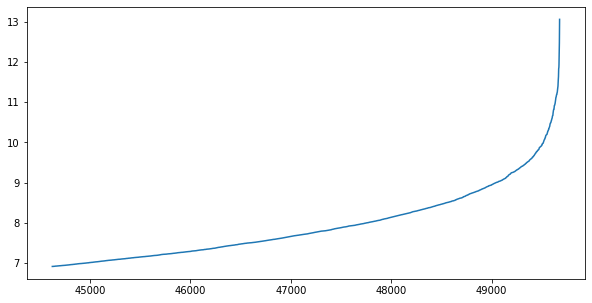

In [30]:
minimum_occurrence = 1000
for index, count in enumerate(counts.values):
    if count > minimum_occurrence:
        break

print(len(counts) - index)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(start=index, stop=len(counts), step=1), np.log(counts.values[index:]))

In [0]:
orders = customer_orders[customer_orders['product_id'].isin(counts[index:])]
orders['product_id'] = orders['product_id'].astype(np.int32)
%time orders = orders.groupby(['order_id'])['product_id'].agg(lambda x: list(x)).reset_index(name='items')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
%time orders = orders[orders['items'].map(len) > 1]

CPU times: user 188 ms, sys: 1.99 ms, total: 190 ms
Wall time: 189 ms


In [28]:
print(size(orders))
print(orders.shape)

10.35 MB
(98305, 2)


In [0]:
orders.to_pickle(path + 'customers_orders4000.pkl')

In [0]:
# baskets = pd.read_pickle('customer_orders5000.pkl')

In [0]:
products[products['product_id'].isin(counts.tail(n=20).index)]

,product_id,product_name,aisle_id,department_id
5875,5876,Organic Lemon,24,4
8276,8277,Apple Honeycrisp Organic,24,4
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
22934,22935,Organic Yellow Onion,83,4
24851,24852,Banana,24,4
24963,24964,Organic Garlic,83,4
26208,26209,Limes,24,4


In [0]:
# from mlxtend.preprocessing import TransactionEncoder
# te = TransactionEncoder()
# te_ary = te.fit(baskets['items']).transform(baskets['items'])
# df = pd.DataFrame(te_ary, columns=te.columns_)
# baskets = baskets.join(df)